## Загрузка и подготовка данных

Загрузим данные, сделаем обзор, проверим на дубликаты и подготовим их для дальнейшей работы

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [2]:
df_0 = pd.read_csv('/content/geo_data_0.csv')
df_1 = pd.read_csv('/content/geo_data_1.csv')
df_2 = pd.read_csv('/content/geo_data_2.csv')

In [3]:
df_0.info()
df_1.info()
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fecf020a990>,
      dtype=object)

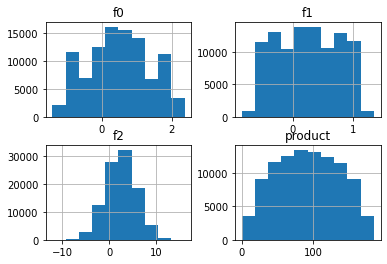

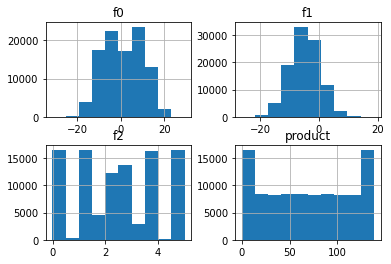

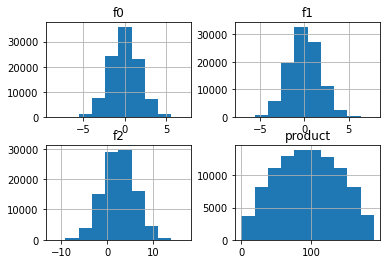

In [4]:
df_0.hist()
df_1.hist()
df_2.hist()

Пропусков - нет, это хорошо. Судя по гистограммам, лучшего всего данные выглядят в 3 регионе, так как нет выбросов и данные распределены нормально. Проверим на дубликаты, хотя их скорее всего тоже не будет, так как данные выглядят чистыми.

In [5]:
display(df_0.duplicated().sum())
display(df_1.duplicated().sum())
display(df_2.duplicated().sum())

0

0

0

Так как цель задачи выбрать регион, то нет смысла в столбцах с `id` предлагаю удалить их.

In [6]:
df_0 = df_0.drop(['id'],axis=1)
df_1 = df_1.drop(['id'],axis=1)
df_2 = df_2.drop(['id'],axis=1)

## Обучение и проверка модели

Разобьем наши данные на тестовую и валидационную выборки

In [7]:
df_0_train, df_0_valid = train_test_split(df_0, test_size=0.25, random_state=101)
df_1_train, df_1_valid = train_test_split(df_1, test_size=0.25, random_state=101)
df_2_train, df_2_valid = train_test_split(df_2, test_size=0.25, random_state=101)

Данные для обучения

In [8]:
features_0_train = df_0_train.drop(['product'], axis=1)
target_0_train = df_0_train['product']
features_1_train = df_1_train.drop(['product'], axis=1)
target_1_train = df_1_train['product']
features_2_train = df_2_train.drop(['product'], axis=1)
target_2_train = df_2_train['product']

Данные для валидации

In [9]:
features_0_valid = df_0_valid.drop(['product'], axis=1)
target_0_valid = df_0_valid['product']
features_1_valid = df_1_valid.drop(['product'], axis=1)
target_1_valid = df_1_valid['product']
features_2_valid = df_2_valid.drop(['product'], axis=1)
target_2_valid = df_2_valid['product']

Обучим нашу модель, по условиям задачи нужно использовать линейную регрессию. Чтобы не запутаться в выборках и результатах, так же сделаем три модели с индексами 0,1,2 для трех разных регионов.

In [10]:
model_0 = LinearRegression().fit(features_0_train, target_0_train)
model_1 = LinearRegression().fit(features_1_train, target_1_train)
model_2 = LinearRegression().fit(features_2_train, target_2_train)

Сделаем предсказания

In [11]:
predict_0 = model_0.predict(features_0_valid)
predict_1 = model_1.predict(features_1_valid)
predict_2 = model_2.predict(features_2_valid)

Сделаем таблицу из средних предсказанных запасов для трех регионов, так же добавим в таблицу истинные данные + среднеквадратическую ошибку (RMSE)

In [12]:
result_df = pd.DataFrame(columns=['region', 'stocks_real_mean', 'stocks_predict_mean', 'RMSE'])

In [13]:
result_df.loc[0]=['number_0', 
                  round(target_0_valid.mean(), 2), 
                  round(sum(predict_0)/len(predict_0), 2), 
                  mean_squared_error(target_0_valid, predict_0, squared=False)]

result_df.loc[1]=['number_1', 
                  round(target_1_valid.mean(), 2), 
                  round(sum(predict_1)/len(predict_1), 2), 
                  mean_squared_error(target_1_valid, predict_1, squared=False)]

result_df.loc[2]=['number_2', 
                  round(target_2_valid.mean(), 2), 
                  round(sum(predict_2)/len(predict_2), 2), 
                  mean_squared_error(target_2_valid, predict_2, squared=False)]

In [14]:
result_df

,region,stocks_real_mean,stocks_predict_mean,RMSE
0,number_0,92.25,92.59,37.760239
1,number_1,68.60,68.60,0.890825
2,number_2,95.03,94.79,40.242378


### Вывод
Как видно из таблицы самая маленькая ошибка для региона 1, следовательно модель для данного региона предсказывает лучше всего. Но при этом в данном регионе самые маленькие запасы.

## Подготовка к расчёту прибыли

### Константы

Создадим переменные по условиям задачи и рассчитаем какое минимальное количество нефти должно быть в скважине для безубыточности

In [15]:
BUDGET_FOR_REGION = 10000000000
NUMBER_OF_OIL_WELL = 200
PRICE_OF_OIL = 450000

In [16]:
min_oil_for_1_well = round(BUDGET_FOR_REGION / NUMBER_OF_OIL_WELL / PRICE_OF_OIL, 2)
print(min_oil_for_1_well)

111.11


Как видно средние запасы в 3х регионах меньше минимального значения запасов для безубыточности, поэтому не получится бурить случайные скважины в этих регионах. Нужно выбирать самые "прибыльные" скважины. Чем и займемся далее.

### Функция расчета прибыли

Напишем функцию, которая будет рассчитывать прибыль для 200 лучших скважин по запасам, результат будет отображаться в миллионах рублей.

In [17]:
def profit(top_200_hist):
    return round((sum(top_200_hist) * PRICE_OF_OIL - BUDGET_FOR_REGION) / 1000000, 2)

### Вывод

Подготовили данные для расчета прибыльности

## Расчёт прибыли и рисков 

Применим технику Bootstrap для расчета средней прибыли для каждого региона и рисков.

In [18]:
def bootstrap_plot (data, model):
    
    state = np.random.RandomState(101)

    values = []
    data_temp = data.drop(['product'],axis=1)
    
    #Bootstrap
    for i in range(1000):
        feature_subsample = data_temp.sample(n=500, replace=True, random_state=state)
        predict_subsample = model.predict(feature_subsample)
        df_subsample = feature_subsample
        df_subsample['product_predict'] = predict_subsample
        temp_series = df_subsample['product_predict'].sort_values(ascending=False).head(200)
        top_200_hist = data.loc[temp_series.index]['product']
        values.append(profit(top_200_hist))

    #Calculating parameters    
    values = pd.Series(values)
    risk = (values <= 0).mean() * 100
    mean = values.mean()
    lower = values.quantile(0.025)
    upper = values.quantile(0.975)
        
    #Plotting
    plt.figure()
    plt.hist(values, bins=20, linewidth=0.5, edgecolor='black')
    plt.xlabel('Profit (mln RUB)')
    plt.ylabel('Counts')
    plt.title('Hist plot of Profit')
    plt.axvline(x=mean, linestyle='--', color='orange') #mean
    plt.axvline(x=lower, color='red')
    plt.axvline(x=upper, color='red')
    plt.grid()
    plt.show()

    #Text
    print("Средняя выручка:", mean, '(пунктирная оранжевая линия)')
    print("95% доверительный интервал:", lower,'-', upper, '(красные линии)')
    print("Риск получить убыток или 0 прибыль:", risk,'%')

---

Для **Региона 0**

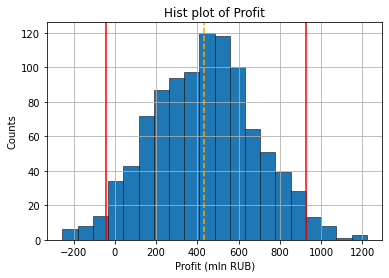

Средняя выручка: 431.55710999999997 (пунктирная оранжевая линия)
95% доверительный интервал: -43.765499999999996 - 925.0202499999997 (красные линии)
Риск получить убыток или 0 прибыль: 4.3 %


In [19]:
bootstrap_plot(df_0, model_0)

Для **Региона 1**

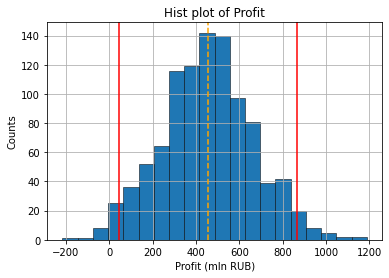

Средняя выручка: 454.89381 (пунктирная оранжевая линия)
95% доверительный интервал: 47.36300000000001 - 866.8087499999997 (красные линии)
Риск получить убыток или 0 прибыль: 1.0 %


In [20]:
bootstrap_plot(df_1, model_1)

Для **Региона 2**

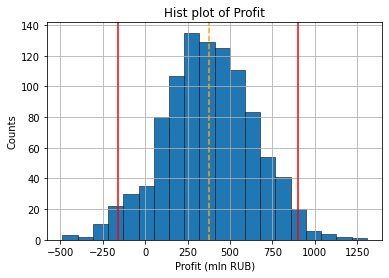

Средняя выручка: 374.61751999999996 (пунктирная оранжевая линия)
95% доверительный интервал: -160.96949999999998 - 903.5802499999999 (красные линии)
Риск получить убыток или 0 прибыль: 7.9 %


In [21]:
bootstrap_plot(df_2, model_2)

### Вывод

На основании графиков и расчетов можно сделать вывод, что самым выгодным для освоения с финансовой точки зрения является **Регион 1**